In [1]:
import sys
sys.path.append('../')

import thermonets as tn
import numpy as np
import heyoka as hy
import pykep as pk

# plotting stuff
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2

## Error test for cart2geo

In [2]:
err = []
iters = 4
earth_radius = 6371000
for i in range(300000):
    a = np.random.uniform(earth_radius + 100000, earth_radius + 700000)
    e = np.random.uniform(0, 0.2)
    i = np.random.uniform(-np.pi,np.pi)
    W = np.random.uniform(0,2*np.pi)
    w = np.random.uniform(0.,2*np.pi)
    M = np.random.uniform(0., 2*np.pi)
    r,v = pk.par2ic([a,e,i,W,w,M], pk.MU_EARTH)
    x,y,z = r
    truth = np.array(tn.cart2geo(x,y,z, iters=12))
    approx = tn.cart2geo(x,y,z, iters=iters)
    err.append(np.linalg.norm(np.array(approx) - truth))
print("Max error:", np.max(err), "m")

Max error: 0.0036088963970541954 m


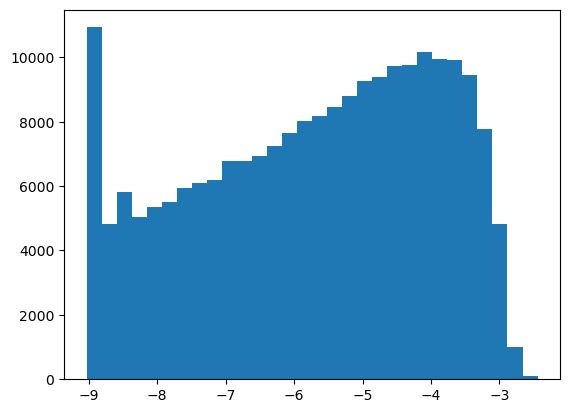

In [3]:
err = np.array(err)
plt.hist(np.log10(err[err>0]), bins=30);

In [4]:
x,y,z = hy.make_vars("x","y","z")
h, phi, lam = tn.cart2geo(x,y,z, iters=12, symbolic=True)

In [5]:
cf = hy.make_cfunc([h], vars= [x,y,z])
len(cf.decomposition)

161